# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [1]:
import os
import pandas as pd
import numpy as np



In [2]:
raw_df=pd.read_csv('train.tsv',sep='\t')

In [3]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [4]:
train_df=pd.read_csv('train.tsv',sep='\t')
test_df=pd.read_csv('test.tsv',sep='\t')
sub_df=pd.read_csv('sampleSubmission.csv',sep='\t')

In [5]:
train_df.shape,test_df.shape

((156060, 4), (66292, 3))

In [6]:
train_df["Phrase"].values[:10]

array(['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
       'A series of escapades demonstrating the adage that what is good for the goose',
       'A series', 'A', 'series',
       'of escapades demonstrating the adage that what is good for the goose',
       'of',
       'escapades demonstrating the adage that what is good for the goose',
       'escapades',
       'demonstrating the adage that what is good for the goose'],
      dtype=object)

In [7]:
train_df['Sentiment'].unique()

array([1, 2, 3, 4, 0])

In [8]:
train_df.Sentiment.value_counts(normalize=True)

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

<AxesSubplot:>

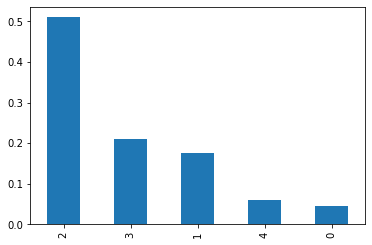

In [9]:
train_df.Sentiment.value_counts(normalize=True).plot(kind='bar')

In [10]:
sub_df.head()

,"PhraseId,Sentiment"
0,"156061,2"
1,"156062,2"
2,"156063,2"
3,"156064,2"
4,"156065,2"


In [11]:
len(train_df["Phrase"])

156060

Summarize your insights and learnings from the dataset below:

* `???`
* `???`
* `???`

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [13]:
import nltk
from nltk.tokenize import word_tokenize

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
q0=train_df['Phrase'].values[0]
q0

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [16]:
token_q0=word_tokenize(q0)

In [17]:
token_q0

['A',
 'series',
 'of',
 'escapades',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the',
 'goose',
 'is',
 'also',
 'good',
 'for',
 'the',
 'gander',
 ',',
 'some',
 'of',
 'which',
 'occasionally',
 'amuses',
 'but',
 'none',
 'of',
 'which',
 'amounts',
 'to',
 'much',
 'of',
 'a',
 'story',
 '.']

In [18]:
from nltk.corpus import stopwords


In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
eng_stopwords=stopwords.words('english')

In [21]:
", ".join(eng_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [22]:
def remove_stopwords(tokens):
    return [words for words in tokens if words.lower() not in eng_stopwords]

In [23]:
token_q0

['A',
 'series',
 'of',
 'escapades',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the',
 'goose',
 'is',
 'also',
 'good',
 'for',
 'the',
 'gander',
 ',',
 'some',
 'of',
 'which',
 'occasionally',
 'amuses',
 'but',
 'none',
 'of',
 'which',
 'amounts',
 'to',
 'much',
 'of',
 'a',
 'story',
 '.']

In [24]:
stop_q0=remove_stopwords(token_q0)

In [25]:
stop_q0

['series',
 'escapades',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'also',
 'good',
 'gander',
 ',',
 'occasionally',
 'amuses',
 'none',
 'amounts',
 'much',
 'story',
 '.']

### Stemming

In [26]:
from nltk.stem.snowball import SnowballStemmer

In [27]:
stemmer=SnowballStemmer(language='english')

In [28]:
q0_stm=[stemmer.stem(word) for word in stop_q0]

In [29]:
small_df=train_df[:5]
small_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
small_vect=CountVectorizer()

In [32]:
small_vect.fit(small_df.Phrase)

CountVectorizer()

In [33]:
small_vect.get_feature_names_out()

array(['adage', 'also', 'amounts', 'amuses', 'but', 'demonstrating',
       'escapades', 'for', 'gander', 'good', 'goose', 'is', 'much',
       'none', 'occasionally', 'of', 'series', 'some', 'story', 'that',
       'the', 'to', 'what', 'which'], dtype=object)

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [34]:
vectors=small_vect.transform(small_df.Phrase)

In [35]:
vectors

<5x24 sparse matrix of type '<class 'numpy.int64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [36]:
vectors.shape

(5, 24)

In [37]:
vectors[0].toarray()

array([[1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1,
        1, 2]])

In [38]:
vectors.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1,
        1, 2],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0,
        1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0]])

In [39]:
stemmer=SnowballStemmer(language='english')
def tokenize(text):
    return [stemmer.stem(word) for word in word_tokenize(text)]

In [40]:
vectorizer=CountVectorizer(lowercase=True,
                          tokenizer=tokenize,
                          stop_words=eng_stopwords)

In [41]:
%%time
vectorizer.fit(train_df.Phrase)

/opt/conda/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 22.2 s, sys: 43.6 ms, total: 22.3 s
Wall time: 22.3 s


CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7ff41267e160>)

In [42]:
len(vectorizer.vocabulary_)

11757

In [43]:
vectorizer.get_feature_names_out()[:100]

array(['!', '#', '$', '&', "'", "''", "'d", "'m", "'n", "'s", '*', '+',
       ',', '-', '--', '-lrb-', '-rrb-', '.', '...', '1', '1.2', '1.8',
       '10', '10,000', '10-cours', '10-year', '10-year-old', '100',
       '100-minut', '100-year', '101', '102-minut', '103-minut', '104',
       '105', '10th', '10th-grade', '11', '110', '112-minut', '12',
       '12-year-old', '120', '127', '129-minut', '12th', '13', '13th',
       '14-year-old', '140', '146', '15', '15-year', '15th', '163',
       '168-minut', '170', '1790', '18', '18-year-old', '1899', '19',
       '1915', '1920', '1930s', '1933', '1937', '1938', '1940s', '1950',
       '1950s', '1952', '1953', '1957', '1958', '1959', '1960', '1960s',
       '1962', '1970', '1970s', '1971', '1972', '1973', '1975', '1979',
       '1980', '1980s', '1984', '1986', '1987', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1997', '1998'], dtype=object)

In [44]:
%%time
inputs=vectorizer.transform(train_df.Phrase)

CPU times: user 24.8 s, sys: 29.3 ms, total: 24.8 s
Wall time: 24.8 s


In [45]:
inputs.shape

(156060, 11757)

In [46]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [47]:
%%time
test_inputs = vectorizer.transform(test_df.Phrase)

CPU times: user 9.79 s, sys: 8.86 ms, total: 9.8 s
Wall time: 9.81 s


## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
train_inputs,val_inputs,train_targets,val_targets=train_test_split(inputs, train_df.Sentiment, 
                                                                        test_size=0.3, random_state=42)

In [50]:
train_inputs.shape , train_targets.shape


((109242, 11757), (109242,))

In [51]:
val_inputs.shape , val_targets.shape

((46818, 11757), (46818,))

### Train Logistic Regression Model



In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
MAX_ITER=1000

In [54]:
model=LogisticRegression(max_iter=MAX_ITER,solver='sag')

In [55]:
%%time
model.fit(train_inputs,train_targets)

CPU times: user 7.78 s, sys: 9.93 ms, total: 7.79 s
Wall time: 7.8 s


LogisticRegression(max_iter=1000, solver='sag')

### Study Predictions on Sample Inputs

In [56]:
train_preds=model.predict(train_inputs)

In [57]:
train_targets

121244    3
9149      3
48116     2
57526     2
40904     1
         ..
119879    2
103694    2
131932    3
146867    3
121958    2
Name: Sentiment, Length: 109242, dtype: int64

In [58]:
train_preds

array([3, 0, 2, ..., 3, 3, 1])

In [59]:
pd.Series(train_preds).value_counts()

2    70235
3    18571
1    14078
4     3601
0     2757
dtype: int64

In [60]:
pd.Series(train_targets).value_counts()

2    55994
3    22886
1    19045
4     6358
0     4959
Name: Sentiment, dtype: int64

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(train_targets, train_preds)

0.7005455777082075

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score 



In [62]:
test_inputs.shape

(66292, 11757)

In [63]:
test_preds=model.predict(test_inputs)

In [64]:
sub_df

,"PhraseId,Sentiment"
0,"156061,2"
1,"156062,2"
2,"156063,2"
3,"156064,2"
4,"156065,2"
...,...
66287,"222348,2"
66288,"222349,2"
66289,"222350,2"
66290,"222351,2"


In [66]:
sub_df.prediction=test_preds

## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional: 
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips: 

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Model 1

In [68]:
from xgboost import XGBRegressor


In [74]:
model_xg=XGBRegressor(random_state=42,n_jobs=-1,max_depth=4)

In [75]:
%%time
model_xg.fit(train_inputs,train_targets)

CPU times: user 4.01 s, sys: 9.92 ms, total: 4.02 s
Wall time: 2.01 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [77]:
preds=model_xg.predict(train_inputs)
preds

array([2.5032995, 1.6975398, 2.0389833, ..., 2.9599762, 2.4053037,
       1.4855504], dtype=float32)

### Model 2

### Model 3

Best Model:

??? 

(include Kaggle score screenshot)

## Submission and Future Work


How to make a submission:

- Add documentation and explanations
- Clean up any stray code/comments
- Include a screenshot of your best score
- Make a submission on the assignment page
- Review evaluation criteria carefully


Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
